Test Accuracy: 0.445


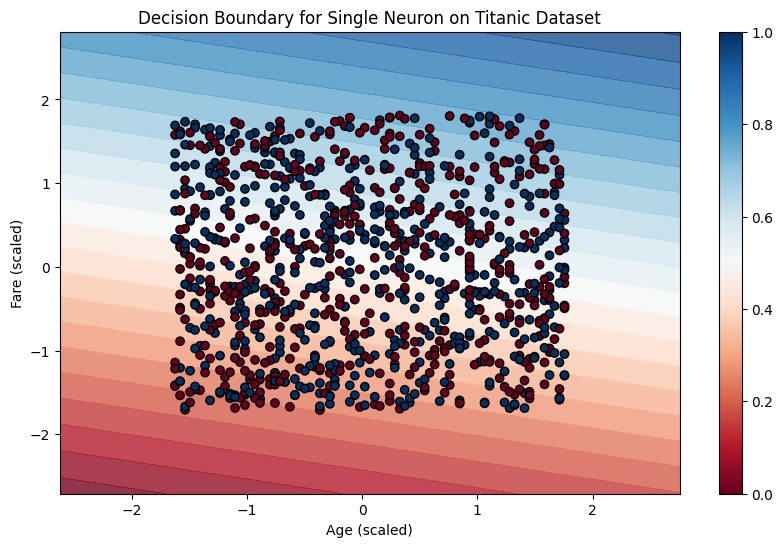

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("titanic.csv")

df = df[['Age', 'Fare', 'Survived']].dropna()
X = df[['Age', 'Fare']].values
y = df['Survived'].values.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

weights = np.random.randn(2, 1)
bias = 0
lr = 0.1

for _ in range(100):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y_train, y_pred)

    dz = y_pred - y_train
    dw = np.dot(X_train.T, dz) / len(X_train)
    db = np.mean(dz)

    weights -= lr * dw
    bias -= lr * db

z_test = np.dot(X_test, weights) + bias
y_pred_test = sigmoid(z_test)
y_pred_class = (y_pred_test > 0.5).astype(int)

accuracy = np.mean(y_pred_class == y_test)
print("Test Accuracy:", accuracy)

# Plotting decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = sigmoid(np.dot(grid, weights) + bias).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y.reshape(-1), cmap="RdBu", edgecolors='k')
plt.xlabel("Age (scaled)")
plt.ylabel("Fare (scaled)")
plt.title("Decision Boundary for Single Neuron on Titanic Dataset")
plt.colorbar()
plt.show()
